# Creating Visualizations

To truly understand a dataset, simply looking at the raw numbers often isn't sufficient. 

Data visualization offers a powerful solution. By presenting information in visual formats like charts, we can unlock our ability to recognize trends and patterns effectively.

# Plotting with Matplotlib

Matplotlib is a widely used and powerful Python library for creating data visualizations. 

It structures each plot as a collection of organized elements, allowing for highly customized charts and graphs.

## Installing Matplotlib

```bash
!pip install matplotlib
```

## Using Matplotlib
When working with Matplotlib in Python, it's common practice to import it using the alias `plt`. 

To get started, let's import `pandas` and `matplotlib`:

In [2]:
## Begin Code
!pip install yfinance
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
## End Code

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_11_0_arm64.whl size=267760 sha256=92e21d0acda304288320679bbb23d952e70e6a2520486ea0512b2cb5112658ac
  Stored in directory: /Users/mmw23/Library/Caches/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


# Common Visualizations

Next, we're going to explore some of the most common and useful ways to visualize data. We'll focus on these four key types:

* Line Graphs
* Bar Graphs
* Pie Charts
* Histograms

## Line Graphs

Line graphs (or line charts) are particularly useful for illustrating trends in data across a continuous period. 

The x-axis of the graph usually represents a time series (like days, months, or years), and the y-axis displays the corresponding numerical data. 

By connecting these data points with lines, we can clearly see how values rise and fall over time.

### Line Graph: Tesla

Speaking of rise and fall over time. Let's take another look at Tesla's Stock Performance.

Let's Create a DataFrame to contain Tesla's Year-to-Date stock performance using the `yfinance` module:

In [10]:
## Begin Code
tesla_ticker = "TSLA"

tesla = yf.Ticker(tesla_ticker)

tesla_history = tesla.history(period = "ytd")

tesla_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-05:00,390.100006,392.730011,373.040009,379.279999,109710700,0.0,0.0
2025-01-03 00:00:00-05:00,381.480011,411.880005,379.450012,410.440002,95423300,0.0,0.0
2025-01-06 00:00:00-05:00,423.200012,426.429993,401.700012,411.049988,85516500,0.0,0.0
2025-01-07 00:00:00-05:00,405.829987,414.329987,390.000000,394.359985,75699500,0.0,0.0
2025-01-08 00:00:00-05:00,392.950012,402.500000,387.399994,394.940002,73038800,0.0,0.0


Next up, using `matplotlib`, let's visualize Tesla's closing price using the following steps:

__Create the Line Graph__
* `plt.figure(figsize=(12, 6))`: Creates a new figure for the plot with a specified size (width=12 inches, height=6 inches). This helps in making the plot more readable.
* `plt.plot(tesla_history.index, tesla_history['Close'], label='Tesla Stock Price', color='blue')`: This is the core plotting function:
    * `tesla_history.index`: Provides the dates for the x-axis.
    * `tesla_history['Close']`: Provides the closing prices for the y-axis. We are choosing to plot the closing price. You could also plot 'Open', 'High', 'Low', or 'Adj Close'.
    * label='Tesla Stock Price': Sets the label for the line, which will appear in the legend.
    * color='blue': Sets the color of the line to blue.

__Add Labels and Title__
* `plt.xlabel("Date")`: Sets the label for the x-axis as `"Date"`.
* `plt.ylabel("Closing Price (USD)")`: Sets the label for the y-axis as `"Closing Price (USD)"`.
* `plt.title("Tesla Stock Price Over the Last Year")`: Sets the title of the plot.
* `plt.grid(True)`: Adds a grid to the plot, which can make it easier to read the values.
* `plt.legend()`: Displays the legend, which identifies the plotted line.

__Rotate x-axis labels for better readability__
* `plt.xticks(rotation=45)`: Rotates the x-axis labels by 45 degrees. This is often useful when you have many dates to prevent the labels from overlapping.
* `plt.tight_layout()`: Adjusts the plot layout to provide reasonable spacing between different elements, preventing labels from getting cut off.

__Display the Plot__
plt.show(): Displays the generated plot.


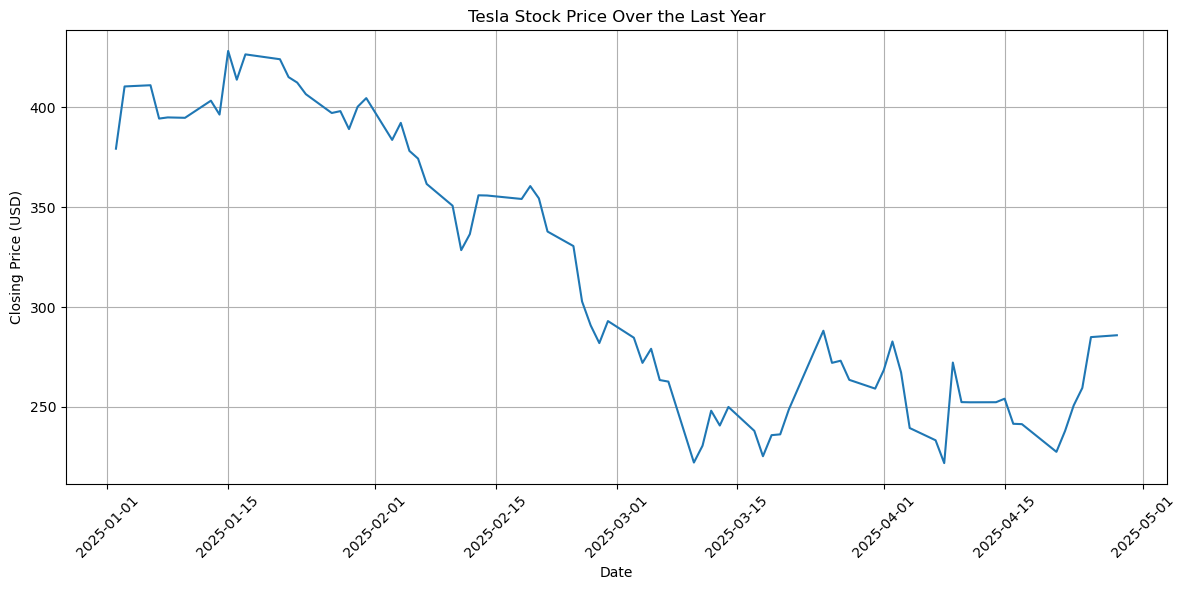

In [18]:
figure_size = (12, 6)
x = tesla_history.index
y = tesla_history["Close"]
x_label = "Date"
y_label = "Closing Price (USD)"
title = "Tesla Stock Price Over the Last Year"
line_color = "blue"

plt.figure(figsize = figure_size)
plt.plot(x, y)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Bar Graphs

Bar graphs are used to represent categorical data with rectangular bars. 

Typically, the height of each bar is proportional to the value it represents, making it easy to visually compare the magnitudes of different categories. 

While bars can be horizontal, they are most often displayed vertically. This allows for quick and intuitive comparisons between groups.

In [19]:
## Begin Code
URL = "https://s3.amazonaws.com/biketown-tripdata-public/2018_05.csv"

biketown = pd.read_csv(URL)

biketown.head()
## End Code

,RouteID,PaymentPlan,StartHub,StartLatitude,StartLongitude,StartDate,StartTime,EndHub,EndLatitude,EndLongitude,EndDate,EndTime,TripType,BikeID,BikeName,Distance_Miles,Duration,RentalAccessPath,MultipleRental
0,6624288,Subscriber,NW 13th at Marshall,45.530804,-122.684423,5/1/2018,0:06,NW 2nd at Everett,45.525367,-122.672546,5/1/2018,0:11,NaN,6503,0326 BIKETOWN,0.86,0:05:49,keypad,False
1,6624313,Subscriber,NW Johnson at Jamison Square,45.528637,-122.682019,5/1/2018,0:11,NaN,45.526398,-122.689363,5/1/2018,0:16,NaN,6162,0874 BIKETOWN,0.51,0:04:32,keypad_rfid_card,False
2,6624387,Subscriber,NW Marshall at Tanner Springs Park,45.530831,-122.681596,5/1/2018,0:24,NW Couch at 11th,45.523742,-122.681813,5/1/2018,0:27,NaN,6535,0817 BIKETOWN,0.75,0:03:28,keypad,False
3,6624410,Subscriber,NaN,45.516459,-122.630957,5/1/2018,0:28,NaN,45.516527,-122.622968,5/1/2018,0:30,NaN,6179,0503 BIKETOWN,0.35,0:02:29,keypad,False
4,6624448,Casual,NaN,45.529077,-122.654351,5/1/2018,0:36,NE 11th at Holladay Park,45.530279,-122.654669,5/1/2018,0:34,NaN,6548,0591 BIKETOWN,4.38,NaN,keypad,False


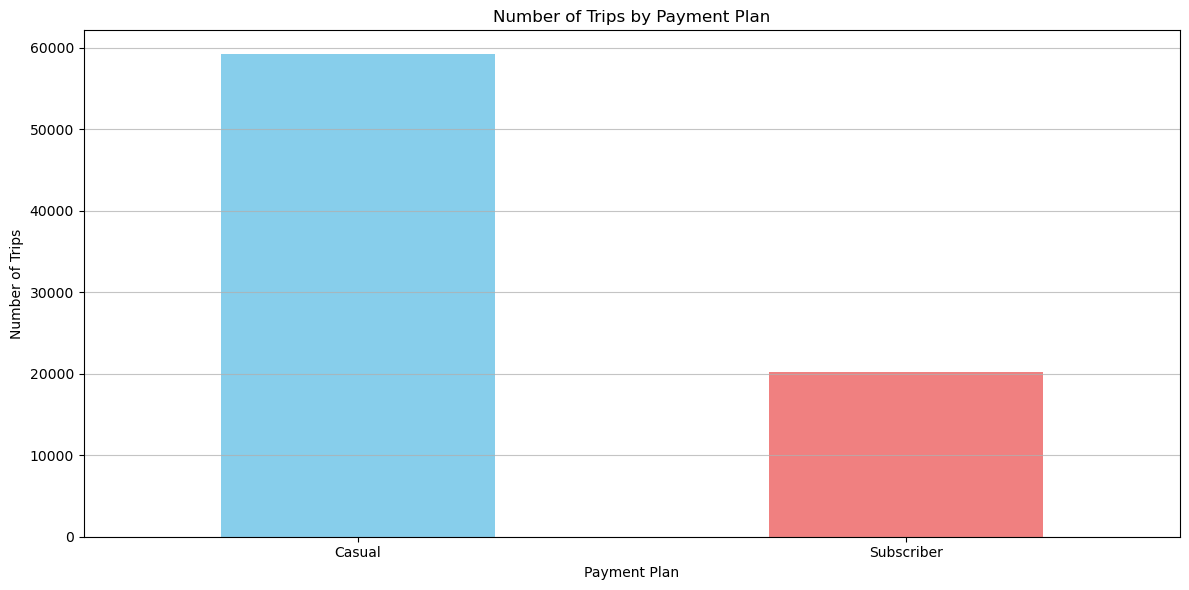

In [24]:
## Begin Code

# Count the number of trips for each user type
payment_plans = biketown['PaymentPlan'].value_counts()

# Create the bar graph
size = (12, 6)
colors = ['skyblue', 'lightcoral']
title = 'Number of Trips by Payment Plan'
x_label = 'Payment Plan'
y_label = 'Number of Trips'

plt.figure(figsize=size)
payment_plans.plot(kind='bar', color=colors)

# Labels and Titles
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show Plot
plt.show()


## End Code

## Pie Charts

Pie charts are circular graphs that display the proportion of each category as a percentage of the total. 

The entire pie represents 100% of the data, and each slice represents a different category. 

The area of each slice is proportional to the percentage that category contributes to the whole dataset, offering a clear visual comparison of these proportions.

### Pie Chart: Example

In [63]:
## Begin Example
FILE = "../data/players_22.csv"

fifa = pd.read_csv(FILE, usecols=["preferred_foot"])

fifa.head()
## End Example

,preferred_foot
0,Left
1,Right
2,Right
3,Right
4,Right


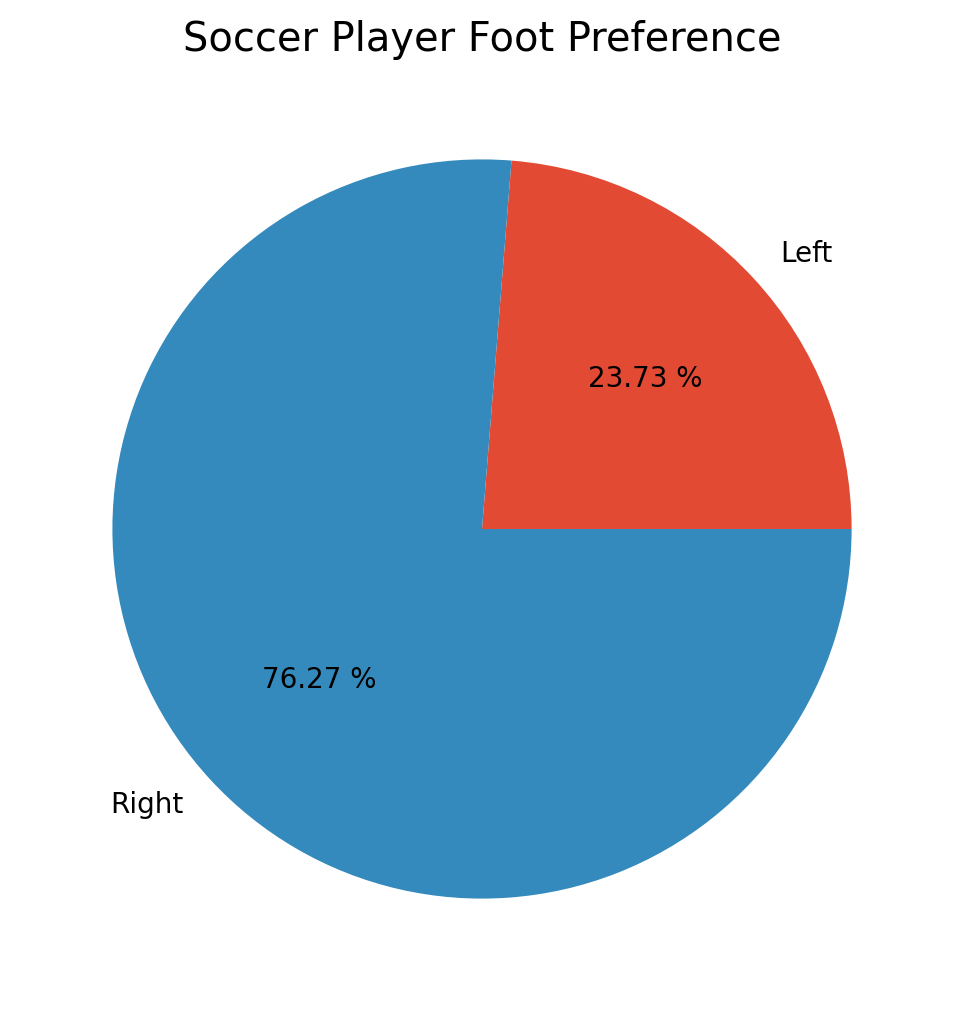

In [82]:
## Begin Example

# Get Value Counts
counts = fifa.value_counts()
right_foot = counts["Right"]
left_foot = counts["Left"]

# Create Pie Chart
plt.figure(figsize=(12,6), dpi = 200)

# Labels and What Not
title = ("Soccer Player Foot Preference")
labels = ["Left", "Right"]
slices = [left_foot, right_foot]

plt.pie(slices, 
        labels = labels,
        autopct="%.2f %%")

plt.title(title)

# Show the Chart
plt.show()

## Histograms

Histograms are a type of bar chart specifically designed to show frequency distributions. 

For each unique value (or a defined interval of values) in a dataset, a vertical bar is drawn. 

The height of this bar directly corresponds to the frequency – that is, how many times that particular value (or values within the interval) appears in the data.